In [1]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf

print("TensorFlow version: {}".format(tf.__version__))
print("Eger execetion: {}".format(tf.executing_eagerly()))

TensorFlow version: 2.3.0
Eger execetion: True


In [2]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                          origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

8192/2194 [================================================================================================================] - 0s 0us/step
Local copy of the dataset file: /Users/isonoyuma/.keras/datasets/iris_training.csv


In [6]:
train_dataset_fp

'/Users/isonoyuma/.keras/datasets/iris_training.csv'

In [7]:
# CSV ファイルの列の順序
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'specoes']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: specoes


In [8]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

In [10]:
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(train_dataset_fp,
                                                      batch_size,
                                                      column_names=column_names,
                                                      label_name=label_name,
                                                      num_epochs=1)

In [11]:
features, labels = next(iter(train_dataset))

print(features)

OrderedDict([('sepal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([5.8, 5.8, 5.8, 5. , 4.9, 5. , 6.9, 5. , 5.5, 6.3, 4.9, 6.4, 6. ,
       5.4, 4.4, 4.4, 6.8, 6.4, 5. , 5.8, 5.4, 6.4, 5.6, 5.2, 5.5, 6.3,
       6.7, 5.7, 5.2, 6.1, 7.7, 5.4], dtype=float32)>), ('sepal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([2.7, 2.6, 2.7, 3.2, 3.1, 2. , 3.2, 3.4, 3.5, 2.7, 3.1, 2.7, 2.9,
       3.9, 3. , 2.9, 3. , 3.1, 3.5, 4. , 3.4, 3.2, 2.5, 2.7, 2.4, 2.5,
       3.3, 4.4, 3.4, 3. , 3. , 3. ], dtype=float32)>), ('petal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([4.1, 4. , 5.1, 1.2, 1.5, 3.5, 5.7, 1.6, 1.3, 4.9, 1.5, 5.3, 4.5,
       1.3, 1.3, 1.4, 5.5, 5.5, 1.6, 1.2, 1.5, 4.5, 3.9, 3.9, 3.7, 5. ,
       5.7, 1.5, 1.4, 4.9, 6.1, 4.5], dtype=float32)>), ('petal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([1. , 1.2, 1.9, 0.2, 0.1, 1. , 2.3, 0.4, 0.2, 1.8, 0.1, 1.9, 1.5,
       0.4, 0.2, 0.2, 2.1, 1.8, 0.6, 0.2, 0.4, 1.5, 1.1, 1.4,

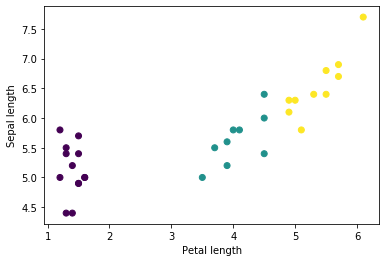

In [12]:
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()